# Running pyPartAnalysis on ImpactT Data

We look at the example case of a electron distribution of 20480 particles being accelerated after emission from the cathode of an RF photoinjector up to about 5 MeV with some weak focusing provided by a solenoid with $B_z = 0$ at the cathode surface.

We begin by loading the necessary modules:

In [1]:
import pyPartAnalysis.particle_accelerator_utilities as pau
import pyPartAnalysis.IMPACTZ_analysis as imp
import pyPartAnalysis.read_partial_norm as rpn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

## Importing Particle Distribution

We can import a text file for a particle distribution file in ImpactT format.

In [3]:
file_name = 'fort.50'

In [4]:
df_norm = rpn.read_fort_norm_momentum(file_name)

In [5]:
df_norm.head()

,x,GBx,y,GBy,z,GBz
0,0.000323,0.001925,-0.000467,-0.002848,0.399899,10.675817
1,0.000194,0.001138,-0.000593,-0.003571,0.399905,10.674877
2,0.000295,0.001799,-0.000448,-0.002710,0.399893,10.677268
3,0.000372,0.002206,-0.000459,-0.002788,0.399901,10.675402
4,0.000270,0.001650,-0.000512,-0.003088,0.399897,10.676311


From this we can compute the average kinetic energy of the distribution from the normalized momentum.

In [6]:
gamma = pau.gammabeta2gamma(df_norm.GBx,df_norm.GBy,df_norm.GBz)
kinetic_energy = np.mean(pau.gamma2KE(gamma))

In [7]:
print("Average Kinetic Energy: %0.2f MeV" % (kinetic_energy*1e-6) )

Average Kinetic Energy: 4.96 MeV


## Converting to Phase Space Coordinates

We convert the distribution from the normalized units output to phase space coordinates:

$$
    x,x^\prime,y,y^\prime,z,\delta
$$

where $\delta$ is the normalized energy spread. Once the distribution is in this format, we can apply many of the functions found in the `IMPACTZ_analysis` submodule of `pyPartAnalysis`

In [8]:
df = rpn.convert_phase_space(df_norm)

In [9]:
df.head()

,x,xp,y,yp,z,delta
0,0.000323,0.000180,-0.000467,-0.000267,0.399899,0.002146
1,0.000194,0.000107,-0.000593,-0.000335,0.399905,0.002059
2,0.000295,0.000168,-0.000448,-0.000254,0.399893,0.002281
3,0.000372,0.000207,-0.000459,-0.000261,0.399901,0.002108
4,0.000270,0.000155,-0.000512,-0.000289,0.399897,0.002192


The phase space along the three dimensions can be plotted using the distribution in this format:

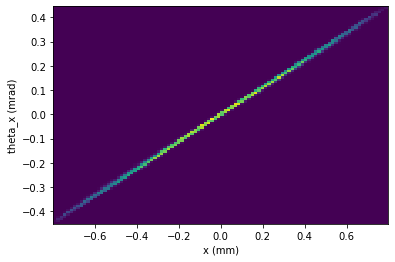

In [10]:
imp.plot_phase_space_density(df,'x',[100,100]);

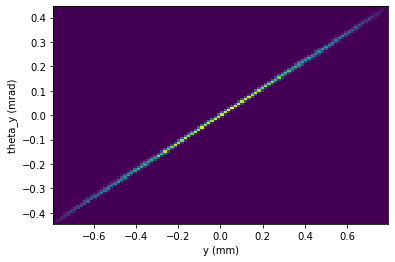

In [11]:
imp.plot_phase_space_density(df,'y',[100,100]);

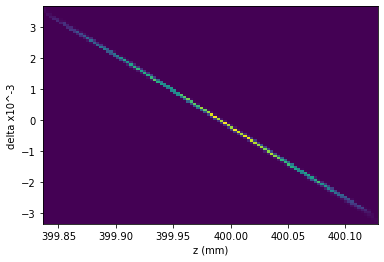

In [12]:
imp.plot_phase_space_density(df,'z',[100,100]);

Note that `convert_phase_space` does not zero the mean as can be seen in the z phase space plot above.

## Getting Information About Distributions

For ImpactT, `fort.40` is the distribution at the start of the simulation and `fort.50` is the distribution at the end of the simulation.

If we use `read_norm`, the `read_fort_norm_momentum` and `convert_phase_space` methods are performed at the same time, yielding the distribution in the phase space coordinates.

In [13]:
df_input = rpn.read_norm('fort.40')

Using `print_twiss`, we can print the Twiss parameters for a distribution in phase space coordinates, which is useful for determing beam quality or whether it is focusing or defocusing (among other properties).

In [14]:
imp.print_twiss(df_input,kinetic_energy=kinetic_energy)

emitn = [2.73589005e-05 2.71957774e-05 3.97860256e-13]
alpha = [ 0.01059053  0.00389844 -0.00570646]
beta = [8.81761649e-05 8.81079496e-05 4.19892821e-03]
gamma = [11342.20524366 11349.88615724   238.16376783]
emit = [2.56824705e-06 2.55293430e-06 3.73481176e-14]


In [15]:
df_output = rpn.read_norm('fort.50')

In [16]:
imp.print_twiss(df_output,kinetic_energy=kinetic_energy)

emitn = [1.67316477e-08 1.69859776e-08 1.86243082e-08]
alpha = [-45.43497847 -44.8749623   57.37680561]
beta = [81.29313142 80.19315419  2.47687717]
gamma = [  25.40604886   25.12386826 1329.53618222]
emit = [1.57064078e-09 1.59451536e-09 1.74830947e-09]


## Linear Transport Matrix

We can get the linear transport matrix that describes the particle dynamics between these two positions in the beamline as well.

In [17]:
rmat,_ = imp.get_transport_matrix(input_df=df_input,output_df=df_output)

In [18]:
print(pd.DataFrame(rmat,columns=['x','xp','y','yp','z','delta'],index=['x','xp','y','yp','z','delta']))

               x        xp          y        yp             z       delta
x       0.141859 -0.000005   0.017460 -0.000007  4.557159e+00   -0.428310
xp      0.076923 -0.000003   0.010142 -0.000004 -4.529266e+00   -0.236497
y       0.027627 -0.000005  -0.082676  0.000015  1.064506e+01    0.458230
yp      0.015979 -0.000003  -0.044708  0.000008  3.273176e+00    0.256019
z     -51.369553  0.000755 -24.867643 -0.004018 -7.487951e+06  179.825866
delta  -0.138838  0.000042   1.004628 -0.000080  2.053976e+01    2.108487


## Looking at Fort.18: Reference Particle Data

To import the standard fort text files (that are not particle distributions), we use `read_fort`. Note that there is a version of `read_norm` in the `pyPartAnalysis.IMPACTZ_analysis` submodule that performs this importation for files generated by ImpactZ.

We look at the information calculated for the reference particle at each time step by importing `fort.18`.

In [19]:
ref_data = rpn.read_fort('fort.18')

In [20]:
ref_data.head()

,t,dist,gamma,KE,beta,Rmax,energy_deviation
0,0.000000e+00,-5.030073e-08,1.000006,0.000003,0.003315,0.000034,0.000003
1,5.250000e-15,-4.718699e-08,1.000006,0.000003,0.003315,0.000034,0.000003
2,1.050000e-14,-4.407314e-08,1.000006,0.000003,0.003315,0.000034,0.000003
3,1.575000e-14,-4.095888e-08,1.000006,0.000003,0.003315,0.000034,0.000003
4,2.100000e-14,-3.784371e-08,1.000006,0.000003,0.003316,0.000034,0.000003


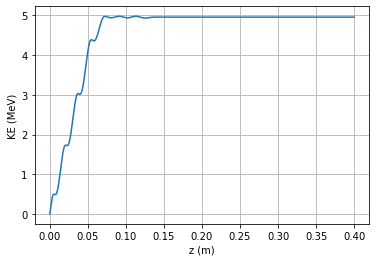

In [21]:
plt.plot(ref_data.dist,ref_data.KE);

plt.grid()
plt.xlabel('z (m)');
plt.ylabel('KE (MeV)');

## Looking at Fort.24: X Dimension

We begin by importing the fort.24 file which contains information about the transverse x dimension of the distribution at each time step.

In [22]:
x_data = rpn.read_fort('fort.24')

The columns of the dataframe are as follows:
- Time
- Z Position
- Average X position
- X RMS Beam Size
- Average X momentum
- X RMS Momentum
- X Alpha Twiss Parameter
- X Normalized Emittance

This information (along with descriptions of what each fort file contains) can be found in the documentation for [ImpactT](https://github.com/impact-lbl/IMPACT-T/blob/master/doc/ImpactTv2.pdf)

In [23]:
x_data.head()

,t,z,avgX,rmsX,avgPx,rmsPx,alphaX,rmsEmitN
0,0.000000e+00,-5.030073e-08,-8.784466e-08,0.000015,0.000002,0.000501,9.519542e-11,7.539521e-09
1,5.250000e-15,-4.718699e-08,-8.784466e-08,0.000015,0.000002,0.000501,9.519542e-11,7.539521e-09
2,1.050000e-14,-4.407314e-08,-8.784465e-08,0.000015,0.000002,0.000501,9.519541e-11,7.539521e-09
3,1.575000e-14,-4.095888e-08,-8.784461e-08,0.000015,0.000002,0.000501,9.519534e-11,7.539521e-09
4,2.100000e-14,-3.784371e-08,-8.784438e-08,0.000015,0.000002,0.000501,9.519491e-11,7.539520e-09


Using matplotlib or another plotting library, it is simple to plot quantities vs z position in the beamline:

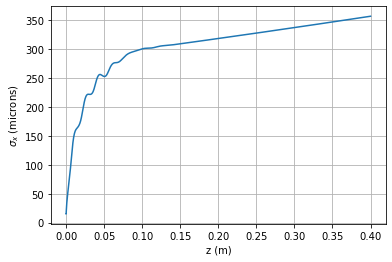

In [24]:
plt.plot(x_data.z,x_data.rmsX*10**6);
    
plt.grid()
plt.xlabel('z (m)');
plt.ylabel('$\sigma_x$ (microns)');

Here is the normalized emittance as well:

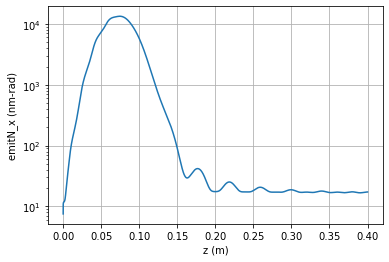

In [25]:
plt.plot(x_data.z,x_data.rmsEmitN*10**9);

#plt.ylim(0,40)
plt.grid()
plt.xlabel('z (m)');
plt.ylabel('emitN_x (nm-rad)');
plt.yscale('log')

`read_fort` works as equally as well for reading the other automatically generated files from ImpactT that are not full particle distributions.

# Normalized Coordinates

To see if there are any nonlinearities in the distribution that appear as a function of longitudinal position within the bunch, it helps to convert to normalized coordinates.

In [26]:
df_output_norm = imp.normalized_coord(df_output)

If there are no z dependencies or other nonlinearities, we would expect the distribution to look like a perfect circle. However, we see that is not the case for the distribution at the end of the RF photoinjector.

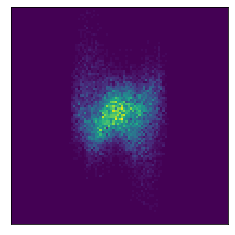

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

bounds = 2e-4;
ax = imp.plot_phase_space_density(df_output_norm,'x',[100,100],ax=ax,cutoff=0,range=[[-bounds,bounds],[-bounds,bounds]]);
ax.set_aspect('equal', adjustable='box')
# ax.set_xlabel('')
# ax.set_ylabel('')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Looking at the Correlations Based on Binning

To investigate further, we bin the distribution along the z direction and look at the phase space for each slice

In [28]:
num_bin_z = 10
dim_bin = 'z'
dim_plot = 'x'

In [29]:
df_output_norm_bin = imp.binning(df_output_norm,dim_bin,num_bin_z)

To aid with the plotting, we filter the outlier particles that are greater than 3 standard deviations out from the distribution.

In [30]:
df_output_norm_bin = df_output_norm_bin[(np.abs(stats.zscore(df_output_norm_bin)) < 3).all(axis=1)]

Below is a helper function for finding the range of the plots so that they are properly scaled.

In [31]:
def get_bounds_norm(df,dim):
    # Get maximum in normalized coordinates along x,y,z phase space
    dim_dict = {'x':['x','xp'],
                'y':['y','yp'],
                'z':['z','delta']}
    
    boundsAll = pd.concat([df.max(),abs(df.min())],axis=1).max(axis=1)
    bounds = boundsAll[dim_dict[dim_plot]].max()
    
    return bounds

In [32]:
bounds = get_bounds_norm(df_output_norm_bin,dim_plot)

Finally, we can see that going from tail of the bunch (on the left) to the head of the bunch (on the right), that the correlation in the x phase space changes based on the z position. This can lead to emittance growth which is undesirable.

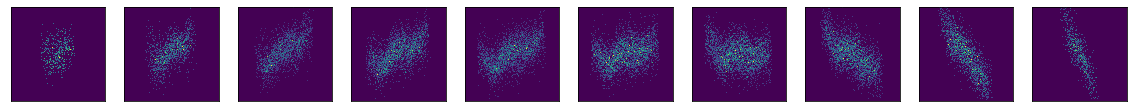

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=num_bin_z,figsize=(20, 10))

for ii in np.arange(0,num_bin_z):
    slice_df_norm = df_output_norm_bin[df_output_norm_bin.bin_z == ii]
    imp.plot_phase_space_density(slice_df_norm,dim_plot,[100,100],ax=axs[ii],cutoff=0,range=[[-bounds,bounds],[-bounds,bounds]]);
    axs[ii].set_aspect('equal', adjustable='box')
    axs[ii].get_xaxis().set_visible(False)
    axs[ii].get_yaxis().set_visible(False)